In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import xarray as xr
import math
import seaborn as sns

os.chdir(  "/Users/etmu9498/research/code/scripts")
import tc_metadata
import make_plots
import make_plots_new_heights
import helper_fns
import cloud_height

os.chdir(  "/Users/etmu9498/research/code/scripts/plotting")
import simple_flight_level_plot

In [11]:
# helper function used to turn all string values into floats
# taken from simple_flight_level_plot.py
# this is a longer function to account for empty strings: turn those values into nans
def empty_str_helper( return_var):
    return_var_temp = np.zeros( len( return_var))
    count = 0
    for line_ind in range( len( return_var)):
        if return_var[ line_ind] == '':
            return_var_temp[line_ind] = np.nan
            count += 1
        else:
            return_var_temp[ line_ind] = float( return_var[ line_ind])
    return return_var_temp.tolist()


In [20]:
# setup
tcname = 'sam'
dataset = 0
metadata = tc_metadata.all_data( tcname)

# load crl data
# tdr_name, crl_name = tc_metadata.choose_new_data( tcname, dataset)
# crl_path =  "/Users/etmu9498/research/data/crl-new-matrices"
# os.chdir( crl_path)
# crl_data = xr.open_dataset( crl_name)

# load flight level data
flight_name = tc_metadata.choose_new_in_situ_name( tcname, dataset)
flight_path = "/Users/etmu9498/research/data/in-situ-new"
os.chdir( flight_path)
flight_data = xr.open_dataset( flight_name)

flight_data

<xarray.Dataset>
Dimensions:            (index: 36116, time: 36116)
Coordinates:
  * index              (index) int64 0 1 2 3 4 ... 36111 36112 36113 36114 36115
  * time               (time) float64 18.1 18.1 18.1 18.1 ... 28.17 28.17 28.17
Data variables: (12/137)
    IWG1_NAMES         (index) object ...
    TIME               (index) object ...
    LATref             (index) object ...
    LONref             (index) object ...
    ALTref             (index) object ...
    GPS_GeoidHt.3      (index) float64 ...
    ...                 ...
    dt                 (index) datetime64[ns] ...
    float_time         (index) float64 ...
    str_time           (index) object ...
    rollval            (index) float64 ...
    pitchval           (index) float64 ...
    distance           (time) float64 ...

In [21]:
# turn in situ strings into floats
time = empty_str_helper( flight_data.time)
print('time converted')
dir = empty_str_helper( flight_data.THDGref)
print( 'P-3 Directions Converted')

time converted
P-3 Directions Converted


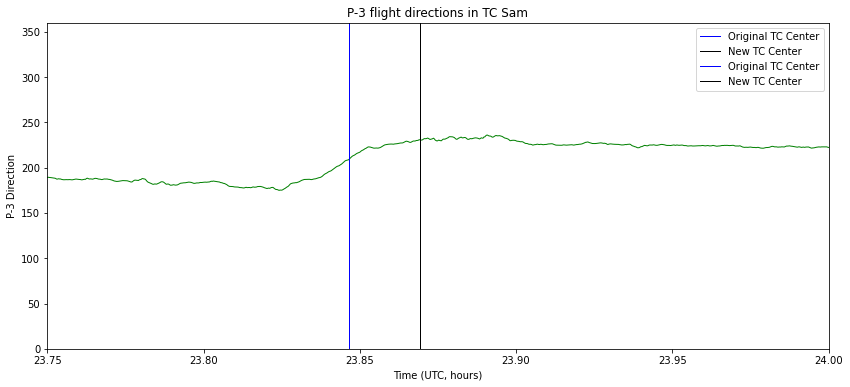

In [30]:
plt.figure( figsize=(14, 6))

plt.plot( time, dir, linewidth=1, c='g')

plt.title( "P-3 flight directions in TC Sam")
plt.xlabel( 'Time (UTC, hours)')
plt.ylabel( 'P-3 Direction')
plt.ylim([0, 360])

# tc sam dataset 0
# plt.xlim([22.5, 23.0])
# plt.ylim( [80, 120])
plt.axvline( x=22.62083333, c='b', linewidth=1, label='Original TC Center')
plt.axvline( x=22.6525, c='k', linewidth=1, label='New TC Center')

# tc sam dataset 1
plt.axvline( x=23.84666667, c='b', linewidth=1, label='Original TC Center')
plt.axvline( x=23.86916666666667, c='k', linewidth=1, label='New TC Center')
plt.xlim([23.75, 24.0])

# tc sam dataset 6
# plt.axvline( x=22.83472222, c='b', linewidth=1, label='Original TC Center')
# plt.axvline( x=22.84333333, c='k', linewidth=1, label='New TC Center')
# plt.xlim([22.5, 23.0])

plt.legend()
# plt.xlim( [20, 24])
